In [11]:
from bokeh import sampledata
# sampledata.download()

In [12]:
import numpy as np
import pandas as pd
import pingouin as pg


In [13]:
from bokeh.sampledata import iris
flowers = iris.flowers
flowers.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Simpson's Paradox: Getting Careful about Correlation Statistics

What is the correlation between the sepal width and the petal length in this dataset? Is it positive, negative, or neither? (Tip: `scipy.stats.pearsonr()`, `scpiy.stats.spearmanr()`,  `pingouin.corr()`)

In [15]:
from scipy import stats
import pingouin as pg

In [16]:
pg.corr(flowers['sepal_width'], flowers['petal_length'])

,n,r,CI95%,p-val,BF10,power
pearson,150,-0.42844,"[-0.55, -0.29]",4.513314e-08,2.762e+05,0.999847


In [18]:
pg.pairwise_corr(flowers, method='spearman')

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,sepal_length,sepal_width,spearman,two-sided,150,-0.166778,"[-0.32, -0.01]",4.136799e-02,0.534714
1,sepal_length,petal_length,spearman,two-sided,150,0.881898,"[0.84, 0.91]",3.443087e-50,1.000000
2,sepal_length,petal_width,spearman,two-sided,150,0.834289,"[0.78, 0.88]",4.189447e-40,1.000000
3,sepal_width,petal_length,spearman,two-sided,150,-0.309635,"[-0.45, -0.16]",1.153938e-04,0.973396
4,sepal_width,petal_width,spearman,two-sided,150,-0.289032,"[-0.43, -0.14]",3.342981e-04,0.951341
5,petal_length,petal_width,spearman,two-sided,150,0.937667,"[0.91, 0.95]",8.156597e-70,1.000000


Plot the sepal width and the petal length against each other.  What do you think now?  Try out a few different plotting functions:  `plt.scatter()`, `seaborn.scatterplot()`, `df.plot.scatter()`, `seaborn.regplot()`

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

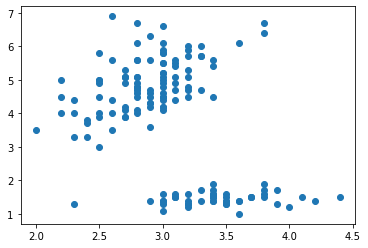

In [20]:
plt.scatter(x=flowers['sepal_width'], y=flowers['petal_length']);

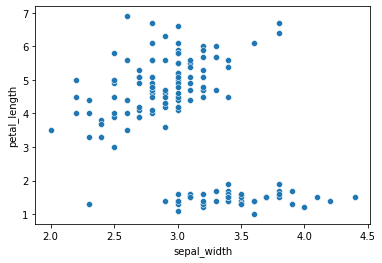

In [21]:
sns.scatterplot(x=flowers['sepal_width'], y=flowers['petal_length']);

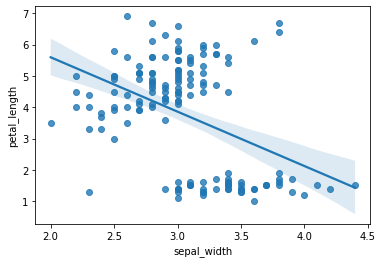

In [22]:
sns.regplot(x=flowers['sepal_width'], y=flowers['petal_length']);

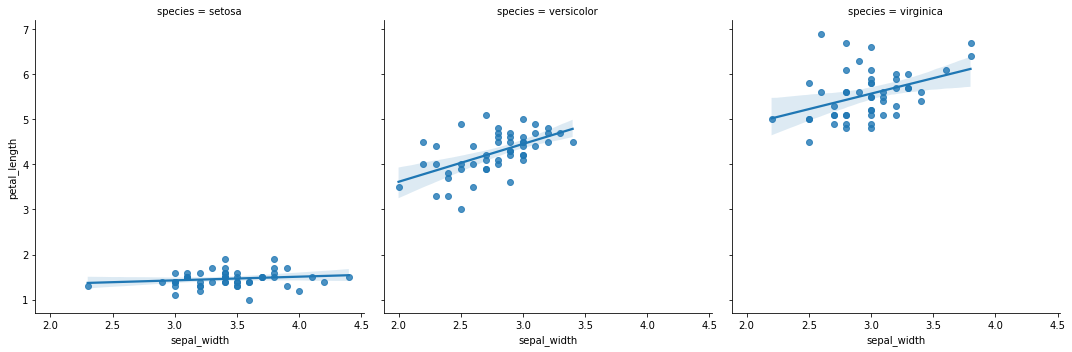

In [28]:
sns.lmplot(data=flowers, x='sepal_width', y='petal_length', col='species');

What's happening here is that a third variable, `"species"`, is influencing both the petal and the sepal shape; this effect is called "Simpson's Paradox".  Seaborn's powerful `lmplot()` function makes it easier to see this:

  - As before:  `seaborn.lmplot(data=df, x='col1', y='col2')`
  - With a third variable: `seaborn.lmplot(data=df, x='col1', y='col2', hue='col3')`
  
To see this effect, let's run the linear model using `lmplot()`, both with and without the species variable.

Without accounting for species:

With accounting for species:

Accounting for the right variables is a big part of science; we should always be aware that the patterns we see in our data can be turned completely upside down when new aspects of a problem are understood and factored in!  

### Intro to [Scikit-Learn](https://scikit-learn.org/stable/): Linear Regression

Scikit-Learn is a massive library of machine learning models, data preprocessing helpers, and model measurement tools; most of its functions follow the same pattern we've used in other libraries:

```python
model = MyModel(params)
model.fit(X, y)
```

The main addition: Prediction!

```python
y_prediction = model.predict(X)
```

Scikit-learn is organized into various subpackages that contain different types of models or functions.  Models are always title-cased.  Here, let's do some linear regression using the `linear_model` subpackage.  

In [29]:
from sklearn import linear_model, metrics

**Exercise**

**Toy Data**: Let's start by using the pre-created data below:

,a,b
0,1.116916,5.591011
1,3.283996,12.517545
2,3.240715,9.235468
3,2.710862,7.872526
4,-2.748773,-8.464353


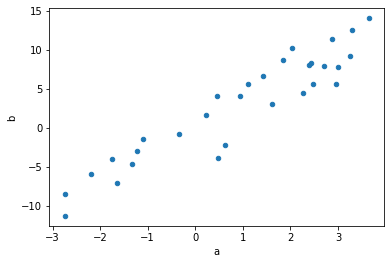

In [37]:
np.random.seed(20)
data = pd.DataFrame()
data['a'] = np.random.uniform(-3, 4, 30)
data['b'] = data['a'] * 3 + np.random.normal(0, 2, 30)
data.plot.scatter(x='a', y='b');
data.head()

Pick a model from the `linear_model` submodule and fit it to the data with the `fit()` method. (A simple starter: `linear_model.LinearRegression`)

In [50]:
x = np.linspace(-3, 3, 10);
# x.reshape(-1, 1)
x[:, None]

array([[-3.        ],
       [-2.33333333],
       [-1.66666667],
       [-1.        ],
       [-0.33333333],
       [ 0.33333333],
       [ 1.        ],
       [ 1.66666667],
       [ 2.33333333],
       [ 3.        ]])

C:\Users\nickdg\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(


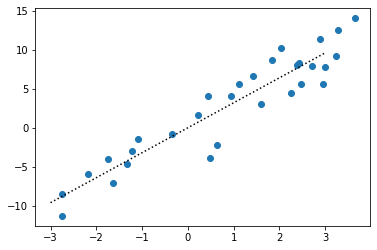

In [57]:
# model = linear_model.LinearRegression()
model = linear_model.BayesianRidge()
model.fit(data[['a']], data['b'])
predicted_b = model.predict(data[['a']])
plt.scatter(x=data.a, y=data.b);
x = np.linspace(-3, 3, 10);
regline = model.predict(x[:, None])
plt.plot(x, regline, 'k:');

Plot the regression line through the data.  Use your fitted model to predict values between -3 and 3, and plot that prediction as a line.  Done!

How accurate was this prediction?  The `sklearn.metrics` submodule has a lot of different functions for measuring the accuracy of various predictions. 

Three useful accuracy/error metrics here are:

| Function | Explanation |
| :------- | :---------  |
| `mean_absolute_error()` | How off the prediction is on average (just subtracts distance between true and predicted values), lower is better | 
| `mean_squared_error()` | How off the prediction is on average, weighting large errors higher, lower is better |
| `r2_score`  | How much of the variance is explained by the regression, higher is better |

In [58]:
from sklearn import metrics

What is the mean squared error of this model's predictions against the true 'b' value?

In [59]:
metrics.mean_absolute_error(data.b, predicted_b)

1.9482426907337538

What is the mean absolute error of this model's predictions against the true 'b' value?

In [60]:
metrics.mean_squared_error(data.b, predicted_b)

5.275307832573942

What is the r-squared value of this model's predictions against the true 'b' value?

In [61]:
metrics.r2_score(data.b, predicted_b)

0.8798884045090329

**Toy Dataset 2**

**Exercise**

**Toy Data**: Let's start by using the pre-created data below:

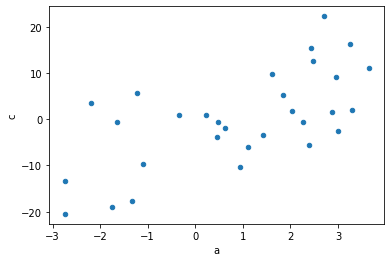

In [70]:
np.random.seed(20)
data = pd.DataFrame()
data['a'] = np.random.uniform(-3, 4, 30)
data['b'] = np.random.uniform(-3, 4, 30)
data['c'] = data['a'] * 3 + data['b'] * -5 + np.random.normal(0, 1, 30)

data.plot.scatter(x='a', y='c');

Fit three linear regression models: 

  1. One that predicts the `c` column using information from just the `a` column
  2. One that predicts the `c` column using information from just the `b` column
  3. One that predicts the `c` column using information from both the `a` and `b` columns
  
Which of the three models explains the most of the data's variance?

In [ ]:
# model = linear_model.LinearRegression()
model = linear_model.BayesianRidge()
model.fit(data[['a', 'b']], data['c'])
predicted_b = model.predict(data[['a']])
plt.scatter(x=data.a, y=data.b);
x = np.linspace(-3, 3, 10);
regline = model.predict(x[:, None])
plt.plot(x, regline, 'k:');

In [ ]:
aa = np.linspace(-400, 400, 100)
bb = np.linspace(-400, 400, 100)
cc = 91 #np.linspace(-100, 100, 50)
dd = 11 #np.linspace(-100, 100, 50)
ag, bg = np.meshgrid(aa, bb)

**Exercise**: Iris Dataset (`flowers`)

Predict the `petal_width` using the `petal_length` for the setosa species, and plot the regression line.

### Classification using Supervised Learning

Okay, let's try out scikit learn on another type of model: classification through clustering!

#### Situation

You've noticed that some of your data wasn't labelled with the species!  Maybe you should just throw the data away, but you think that you might be able to salvage the unlabelled data by using information about the sepal and petal to make educated guesses about the species.  If you can be confident that your guesses are more than 95% accurate, then you'll be confident combining the labelled and unlabelled data into a bigger dataset for your analysis.

#### Load Data

To simulate this situation where some data is unlabelled, below I'm removing the labels ("species") from 15% of the rows.  Now we have two datasets to use: `known` and `unknown`.

In [90]:
from bokeh.sampledata.iris import flowers

np.random.seed(22)
unknown = flowers.groupby('species').sample(frac=0.15).drop(columns='species')
unknown.sample(5)

,sepal_length,sepal_width,petal_length,petal_width
117,7.7,3.8,6.7,2.2
76,6.8,2.8,4.8,1.4
130,7.4,2.8,6.1,1.9
142,5.8,2.7,5.1,1.9
62,6.0,2.2,4.0,1.0


In [91]:
known = flowers.drop(unknown.index)
known.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
121,5.6,2.8,4.9,2.0,virginica
82,5.8,2.7,3.9,1.2,versicolor
36,5.5,3.5,1.3,0.2,setosa


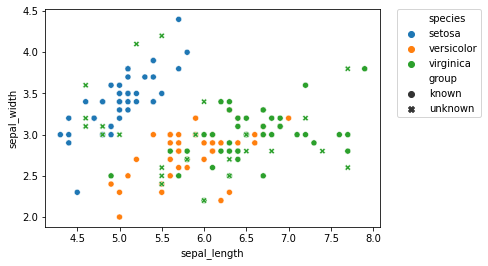

In [92]:
known['group'] = 'known'
unknown['group'] = 'unknown'
unknown['species'] = 'virginica'  # the prediction
df = pd.concat([known, unknown])
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species', style='group'); 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Classification using the KNeighborsClassifier Model

**Exercise**: Using the model imported below, fit a model that predicts species on the known dataset with at least 95% accuracy.

Fit the model on `known` and use `accuracy_score()` to check how accurate it was.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [111]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(known[known.columns[:4]], known['species'])

KNeighborsClassifier()

Use the fitted model to predict species on the `unknown` data:

In [103]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [104]:
model.predict_proba(unknown[unknown.columns[:4]])

array([[1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.5, 0.5],
       [0. , 0.8, 0.2],
       [0. , 0.9, 0.1],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.9, 0.1],
       [0. , 0.3, 0.7],
       [0. , 0.3, 0.7],
       [0. , 0.1, 0.9],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0.2, 0.8],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ]])

In [112]:
prediction = model.predict(unknown[unknown.columns[:4]])

Sanity check: plot the labels and see if it the labels make sense to you.  

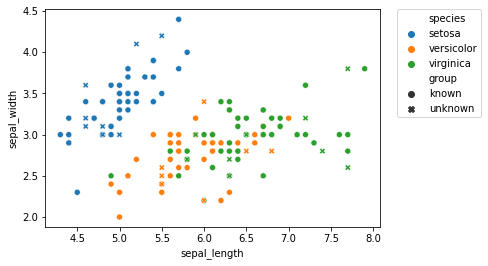

In [113]:
known['group'] = 'known'
unknown['group'] = 'unknown'
unknown['species'] = prediction
df = pd.concat([known, unknown])
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species', style='group'); 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Discussion Question: How Accurately did the model predict species on the unknown data?

#### Quality Control: Splitting Data into Training and Test Datasets

Scikit learn has a function that makes it straightforward to split your data into a training and test dataset:

```python
from sklearn import model_selection
train, test = model_selection.train_test_split(data)
```

Using this approach, you can see how well the data makes predictions on data isn't *wasn't trained on*, which helps pick models that are likely to work on other untrained data.  This is the main idea behind "cross-validation", and helps prevent selecting overtrained models.

**Exercises**

Re-train a model on only a subset of the known data and measure its accuracy on the rest.  Is the accuracy on the test data higher, lower, or the same as the accuracy on the train data?

Make a dataset that combines the known and unknown data (with the predicted species for the unkown data), adding a new column to help show which rows comes from which dataset.  Make a plot showing the two variables you picked in this new dataset using `seaborn.scatterplot()` and check whether the labels seem correct in the plot (tip: `style` maybe a useful attribute for the labels).

You think you can build a good classification model that uses only two of the features in the dataset, but you're not sure which two to pick.  Find the best pair of columns that classify the species.

#### Saving the Model

Hey, we have a really useful machine learning model now; it would be great to be able to use it in the future or in other scripts!  The model can be saved to a file as a Python object using the `joblib` package.

```python
from joblib import dump, load
dump(model, 'MyAwesomeModel.joblib')  # save the model to a file
loaded_model = load('MyAwesomeModel.joblib')  # load the model from a file
```

**Exercise**

Save your classification model to a joblib file:

Save the unlabelled data to a file:

Open up a blank notebook, load the data and the model, fit the data to the model, and plot the results.